In [ ]:
using BenchmarkTools

using Unitful
import Unitful: km, s, Gyr
using UnitfulAstro: Mpc, Gpc, Msun, kpc

include("../src/Cosmojuly.jl")

import .Cosmojuly as cj

In [52]:
#@benchmark cj.draw_mass_with_restrictions(1e+12, 1e+8, 0.1)
cj.subhalo_mass_function(1e+12, 1e+8)

Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


Float64[]


InterruptException: InterruptException:

In [53]:
@benchmark 10^testfun(8.5, 14.5), " ", cj.mean_number_progenitors_below_M(10^8.5, 10^14.5, 1e+8, 0.001)

UndefVarError: UndefVarError: testfun not defined

In [54]:
using Plots

k = 10 .^(range(-4,stop=3,length=5000))

#plot(k, abs.(cj.transfer_function.(k, with_baryons=true)), yscale=:log10, xscale=:log10)
#plot!(k, abs.(cj.transfer_function.(k, with_baryons=false)), yscale=:log10, xscale=:log10)
plot(k,  cj.matter_power_spectrum.(k; with_baryons=true, dimensionless=false), yscale=:log10, xscale=:log10)
plot!(k, cj.matter_power_spectrum.(k; transferFunctionModel=cj.TrivialTF()), yscale=:log10, xscale=:log10)
plot!(k, cj.curvature_power_spectrum.(k), yscale=:log10, xscale=:log10)

MethodError: MethodError: no method matching matter_power_spectrum(::Float64, ::Float64; transferFunctionModel=Main.Cosmojuly.TransferFunction.TrivialTF())
Closest candidates are:
  matter_power_spectrum(::Real, ::Real; power_spectrum, cosmology, transfer_function_model, dimensionless, growth_function, with_baryons) at ~/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/PowerSpectrum.jl:35 got unsupported keyword argument "transferFunctionModel"
  matter_power_spectrum(::Real) at ~/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/PowerSpectrum.jl:35 got unsupported keyword argument "transferFunctionModel"

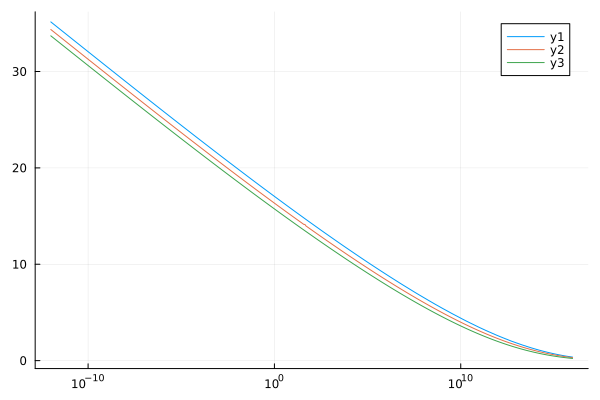

In [55]:
using Plots

m = 10 .^(range(-12,stop=16,length=500))
plot(m, sqrt.(cj.σ².(cj.radius_from_mass.(m, cj.SharpK), cj.SharpK)), xscale=:log10)
plot!(m, sqrt.(cj.σ².(cj.radius_from_mass.(m, cj.TopHat), cj.TopHat)), xscale=:log10)
plot!(m, sqrt.(cj.σ².(cj.radius_from_mass.(m, cj.Gaussian), cj.Gaussian)), xscale=:log10)

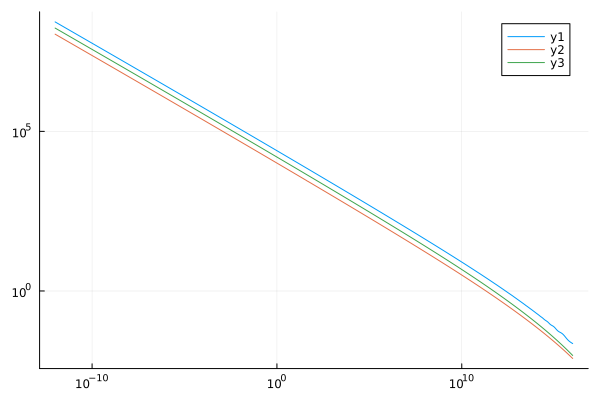

In [56]:
using Plots

m = 10 .^(range(-12,stop=16,length=500))
plot(m, abs.(cj.dσ_dR.(cj.radius_from_mass.(m, cj.SharpK), cj.SharpK)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ_dR.(cj.radius_from_mass.(m, cj.TopHat), cj.TopHat)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ_dR.(cj.radius_from_mass.(m, cj.Gaussian), cj.Gaussian)), xscale=:log10, yscale=:log10)

In [57]:
using Plots

m = 10 .^(range(-12,stop=15,length=500))
plot(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.PressSchechter), xscale=:log10, yscale=:log10)

plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.SethTormen), xscale=:log10, yscale=:log10)

UndefVarError: UndefVarError: transfer_function_model not defined

In [58]:
using Plots

z = 10 .^(range(-2,stop=4,length=100))


Ω_r = MyCosmology.Ω_r.(z)
Ω_m = MyCosmology.Ω_m.(z)
Ω_Λ = MyCosmology.Ω_Λ.(z)

ρ_r = MyCosmology.ρ_r_Msun_Mpc3.(z)
ρ_m = MyCosmology.ρ_m_Msun_Mpc3.(z)
ρ_Λ = MyCosmology.ρ_Λ_Msun_Mpc3.(z)
ρ_c = MyCosmology.ρ_c_Msun_Mpc3.(z)

plot(z, MyCosmology.growth_factor.(z).*(1 .+z), xscale=:log10, color=:blue)
plot!(z, MyCosmology.growth_factor_Carroll.(z).*(1 .+z), xscale=:log10, yscale=:log10, color=:red)

UndefVarError: UndefVarError: MyCosmology not defined

In [61]:
using NLsolve
using BenchmarkTools

function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end

nlsolve(f!, j!, [ 0.1; 1.2])
println(nlsolve(f!, [ 0.1; 1.2]))

func(x, y) = ((x+3)*(y^3-7)+18, sin(y*exp(x)-1))
println(func(0, 1))

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-2.758597248806451e-16, 1.0000000000000002]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5
(0, 0.0)


In [62]:
using Unitful
import Unitful: km, s, Gyr, rad
import UnitfulAstro: Mpc, Gpc, Msun, kpc, pc

D1 = 3.0 
D2 = 6.0 
DS = 8.0 

M1 = 100.0
M2 = 100.0

# For the first test let us imagine everything is in the same plane

y1 = [1e-8, 0.] 
y2 = [0, 1e-8] 

function alpha(x, y, M)
    return 4 .* M * (x .- y) ./ sum((x .- y) .* (x .- y)) * 4.3e-6 / (3e+6)^2  
end

function f!(F, x)
    F[1] = x[1] -  D1 * (1. - D1/DS) * alpha([x[1], x[2]], y1, M1)[1] + D1 * (1. - D2/DS)*alpha([x[3], x[4]], y2, M2)[1]
    F[2] = x[2] -  D1 * (1. - D1/DS) * alpha([x[1], x[2]], y1, M1)[2] + D1 * (1. - D2/DS)*alpha([x[3], x[4]], y2, M2)[2]
    F[3] = x[3] -  D2 * (D1/D2 - D2/DS) * alpha([x[1], x[2]], y1, M1)[1] + D2 * (1. - D2/DS)*alpha([x[3], x[4]], y2, M2)[1]
    F[4] = x[4] -  D2 * (D1/D2 - D2/DS) * alpha([x[1], x[2]], y1, M1)[2] + D2 * (1. - D2/DS)*alpha([x[3], x[4]], y2, M2)[2]
end

function theta(x, D1)
    return x[1:2] ./ D1 * 206265e+6
end

res = nlsolve(f!, [0., 0., 0., 0.]).zero

println(theta(res, D1))


In [ ]:
using Unitful
import Unitful: Length, Density, Mass
import UnitfulAstro: Mpc, Gpc, Msun, kpc, pc
using BenchmarkTools

abstract type MyType{T<:Real} end

struct MyOwnSubType{T<:Real} <: MyType{T}
    a::T
    b::T
end

MyOwnSubType(a::Real, b::Real) = MyOwnSubType(promote(a, b)...)
example_a::MyType = MyOwnSubType(1.2, 3)

MyOwnSubType{Float16} <: MyType

struct Halo{T<:Real}
    ρs::Density{T}
    rs::Length{T}
end

ρs_0 = Msun / kpc^3
rs_0 = kpc

#Halo(ρs::Density{<:Real}, rs::Length{<:Real}) = Halo(promote(ρs/ρs_0, rs/rs_0)...)
#Halo(ρs::Real, rs::Real) = Halo(promote(ρs, rs)...)

halo = Halo(1.2 * Msun / kpc^3, 4.0 * kpc)

println(halo)

mass(h::Halo) = 4. / 3. * pi * h.ρs * h.rs^3 #* Msun 

@benchmark mass(halo)


In [ ]:
using Unitful

length_value = 5.0
mass_value = 2.0

length = length_value * u"m"
mass = mass_value * u"kg"

promoted_type = promote_type(eltype(length), eltype(mass))
promoted_length = promote(length, promoted_type)
promoted_mass = promote(mass, promoted_type)
